In [93]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
points = genfromtxt('C:/Users/New User/Desktop/Linear_Regression/Linear_Reg_Dataset_1.csv', delimiter = ',')
print(points)

x = array(points[:,0])
y = array(points[:,1])


[[ 32.50234527  31.70700585]
 [ 53.42680403  68.77759598]
 [ 61.53035803  62.5623823 ]
 [ 47.47563963  71.54663223]
 [ 59.81320787  87.23092513]
 [ 55.14218841  78.21151827]
 [ 52.21179669  79.64197305]
 [ 39.29956669  59.17148932]
 [ 48.10504169  75.3312423 ]
 [ 52.55001444  71.30087989]
 [ 45.41973014  55.16567715]
 [ 54.35163488  82.47884676]
 [ 44.1640495   62.00892325]
 [ 58.16847072  75.39287043]
 [ 56.72720806  81.43619216]
 [ 48.95588857  60.72360244]
 [ 44.68719623  82.89250373]
 [ 60.29732685  97.37989686]
 [ 45.61864377  48.84715332]
 [ 38.81681754  56.87721319]
 [ 66.18981661  83.87856466]
 [ 65.41605175 118.5912173 ]
 [ 47.48120861  57.25181946]
 [ 41.57564262  51.39174408]
 [ 51.84518691  75.38065167]
 [ 59.37082201  74.76556403]
 [ 57.31000344  95.45505292]
 [ 63.61556125  95.22936602]
 [ 46.73761941  79.05240617]
 [ 50.55676015  83.43207142]
 [ 52.22399609  63.35879032]
 [ 35.56783005  41.4128853 ]
 [ 42.43647694  76.61734128]
 [ 58.16454011  96.76956643]
 [ 57.50444762

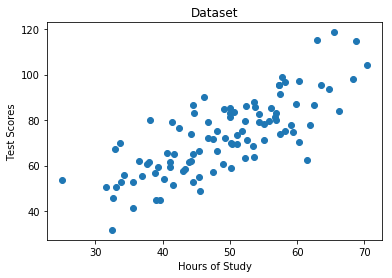

In [94]:
#print(x)
#print(y)
#plt.show() will display the current figure that you are working on.
#plt.draw() will re-draw the figure. This allows you to work in interactive mode and, should you have changed your data or formatting, allow the graph itself to change.

#imports
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
points = genfromtxt('C:/Users/New User/Desktop/Linear_Regression/data.csv', delimiter = ',')
#print(points)

x = array(points[:,0])
y = array(points[:,1])
#plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of Study')
plt.ylabel('Test Scores')
plt.title('Dataset')
plt.show()

In [95]:
#define the parameters

learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

In [97]:
#define the cost function

#In ML, Cost Functions are used to estimate how badly models are performing.
#A Cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y.

def compute_cost(b,m,points):
    total_cost = 0
    N = float(len(points))
    
    #compute the sum of squared errors
    
    for i in range(0, len(points)):
        x = points[i , 0]
        y = points[i , 1]
        total_cost += (y-(m * x + b)) ** 2
        
    #return the average of squared error
    return total_cost/N


In [98]:
#Run gradient_descent_runner() to get optimized parameters b and m
#Gradient Descent is a first-order iterative optimization algorithm for finding the minimum of a function.


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []
    
    #For every iteration, optimize b,m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)
    
    return [b, m, cost_graph] 

In [99]:
def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    
    N = float(len(points))
    
    #Calculate gradient
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient
    
    #Return updated Parameters
    return b_updated, m_updated

In [100]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameteres
print('Optimized b:', b)
print('Optimized m:', m)

#Print error with optimized parameteres
print('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


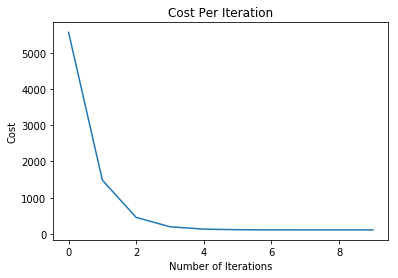

In [101]:
plt.plot(cost_graph)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Per Iteration')
plt.show()

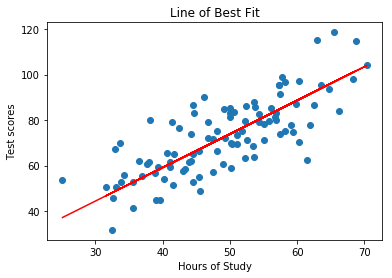

In [102]:
plt.scatter(x, y)

#prefidct y values

pred = m * x + b

#plot predictions as line of best fit

#line of best fit

plt.plot(x, pred, c = 'r')
plt.xlabel('Hours of Study')
plt.ylabel('Test scores')
plt.title('Line of Best Fit')
plt.show()
